In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

T=303.15
p=1E5
Dvec=np.asarray([1.00E-6,1.13E-8,1.13E-8,4.318E-7,4.318E-7,1.00E-21])
mobile=np.asarray([True,True,False,False])
taui=np.asarray([35711.02587,14926.924])
kijvec=np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100])
kijHBvec=np.asarray([0,0,0,0,-0.455211419,0])
Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02,0.02])
Na=np.asarray([1.,1.,3.,653.])
t=np.linspace(0.,(60*2000)**0.5,51)**2

par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kijvec,
"kijA":kijHBvec}
nz=20

Wasser,Ethanol,API, Polymer

(0.0, 1.0)

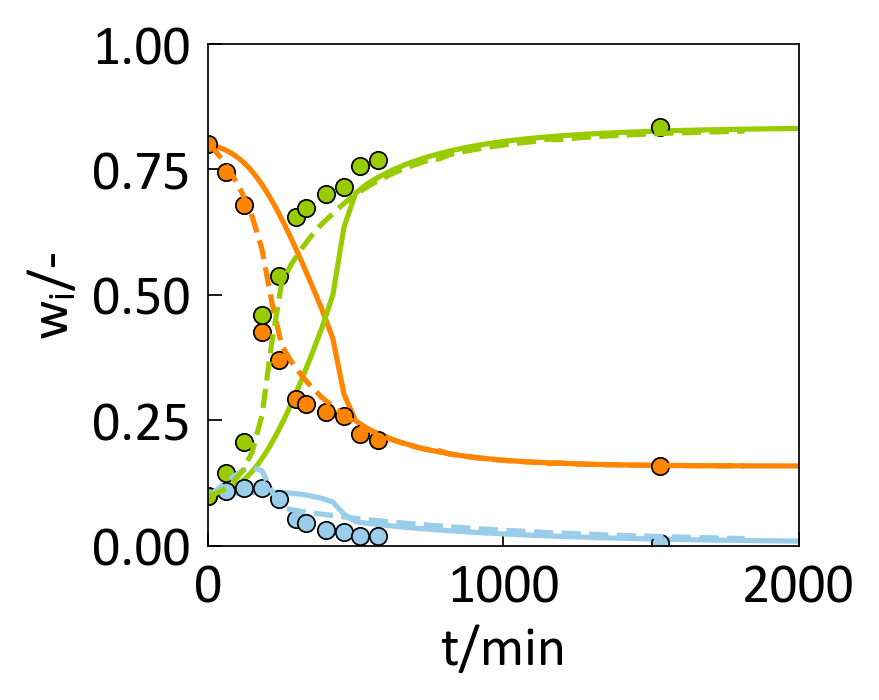

In [2]:
L=0.0185 
dl0=0.3
we0=0.8
ww0=0.1
wf0=1-we0-ww0
wi0=np.asarray([ww0,we0,dl0*wf0,(1-dl0)*wf0])

we8=0.158725973
ww8=0.005951831
wf8=1-we8-ww8
wi8=np.asarray([ww8,we8,dl0*wf8,(1-dl0)*wf8])
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

texp=np.asarray([0,61,121,183,241,299,331,400,460,515,575,1530])
w1exp=np.asarray([0.1,0.10815,0.11449,0.11544,0.09219,0.05345,0.04536,0.03188,0.02658,0.01856,0.01963,0.00595])
w2exp=np.asarray([0.8,0.74591,0.6785,0.42536,0.36927,0.29222,0.28234,0.26616,0.2587,0.22371,0.21173,0.15873])
w3exp=np.asarray([0.1,0.14594,0.207,0.4592,0.53854,0.65433,0.6723,0.70197,0.71472,0.75774,0.76864,0.83532])

fig,ax=plt.subplots()
ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,1],'C3-')
ax.plot(t/60,wt[:,2]+wt[:,3],'C0-')
ax.plot(texp,w1exp,'C1o')
ax.plot(texp,w2exp,'C3o')
ax.plot(texp,w3exp,'C0o')
ax.set_xlabel("t/min")
ax.set_ylabel("$w_i$/-")


ax.plot(a,b,'C1--')
ax.plot(a,c,'C3--')
ax.plot(a,d,'C0--')

plt.xlim([0,2000])
plt.ylim([0,1])

Water, Polymer

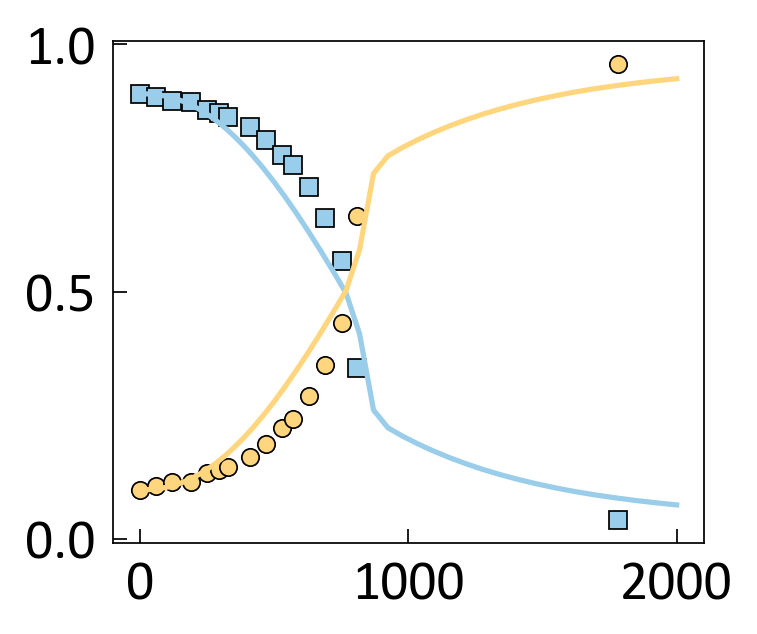

In [3]:
texpw=np.asarray([0,60,120,193,250,296,330,410,470,530,570,630,691,754,810,1780])
wexpw=np.asarray([0.9,0.89299,0.8846,0.88365,0.86635,0.86052,0.8531,0.83376,0.8072,0.77584,0.75664,0.71119,0.64861,0.56269,0.34671,0.03925])

L=0.016 

wi0=np.asarray([0.9,0.,0.,0.1])
wi8=np.asarray([0.03925,0.,0.,1-0.03925])


wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]
fig,ax=plt.subplots()
ax.plot(texpw,wexpw,'C1s')
ax.plot(texpw,1-wexpw,'C5o')

ax.plot(t/60,wt[:,0],'C1-')
ax.plot(t/60,wt[:,3],'C5-')



Ethanol, Polymer

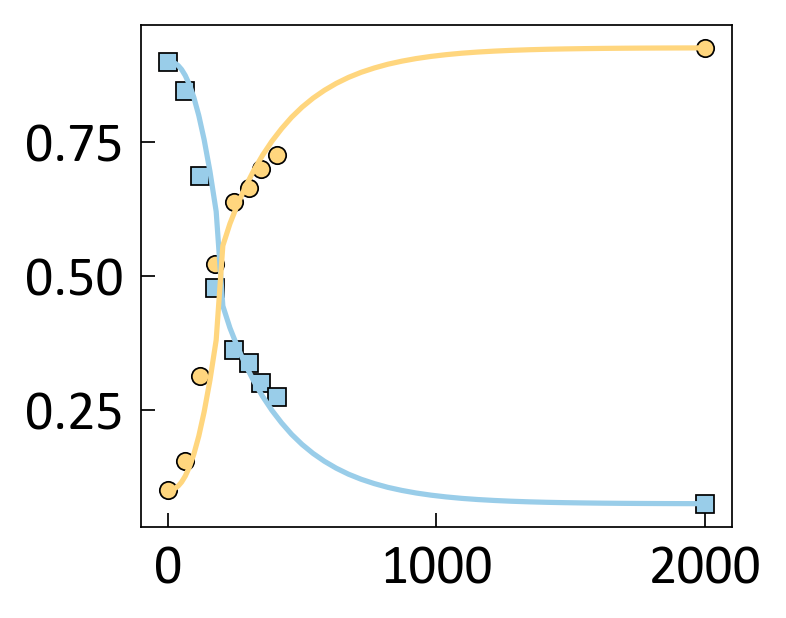

In [4]:
wi0=np.asarray([0.,0.9,0.,0.1])
wi8=np.asarray([0.,0.07407,0.,1-0.07407])
texpe=np.asarray([0,64,120,177,247,301,347,407,2000])
wexpe=np.asarray([0.9,0.84537,0.68653,0.47765,0.36149,0.33674,0.29972,0.27454,0.07407])
L=0.021


wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

fig2,ax2=plt.subplots()
ax2.plot(texpe,wexpe,'C1s')
ax2.plot(texpe,1-wexpe,'C5o')
ax2.plot(t/60,wt[:,1],'C1-')
ax2.plot(t/60,wt[:,3],'C5-')



Water, Ethanol Polymer

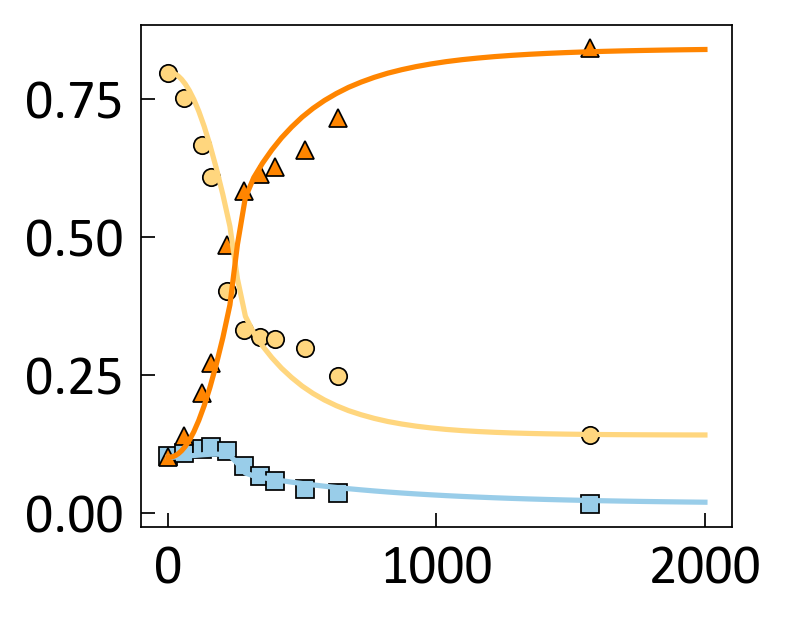

In [5]:
texpp=np.asarray([0,60,128,160,222,283,343,400,510,635,1572])
wexpp1=np.asarray([0.10222,0.10793,0.11579,0.11968,0.11112,0.08517,0.06692,0.05747,0.04321,0.03578,0.01578])
wexpp2=np.asarray([0.79779,0.75332,0.66681,0.60852,0.40236,0.33188,0.31786,0.31535,0.29871,0.24788,0.14054])
wexpp3=np.asarray([0.1,0.13875,0.21739,0.2718,0.48652,0.58294,0.61522,0.62718,0.65808,0.71633,0.84368])

L=0.0185
wi0=np.asarray([0.1,0.8,0.,0.1])
wi8=np.asarray([0.01578,0.14054,0.,0.84368])

wt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,taui=taui,saftpar=par,nz=nz)[0]

fig3,ax3=plt.subplots()
ax3.plot(texpp,wexpp1,'C1s')
ax3.plot(texpp,wexpp2,'C5o')
ax3.plot(texpp,wexpp3,'C3^')

ax3.plot(t/60,wt[:,0],'C1-')
ax3.plot(t/60,wt[:,1],'C5-')
ax3.plot(t/60,wt[:,3],'C3-')
plt.show()


In [6]:

# import scipy
# def fun(x,D1,D2):
#     print(10**D1)
#     print(10**D2)
#     # witB2=time_dep_surface(x*60,wi0,wi8,mobile,np.asarray([10**tau1,10**tau2]))
#     res=Diffusion_MS_iter(x,L,np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]),wi0,wi8,mobile,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB2,nz=7)[0][:,0]
#     print(res)
#     return res

# Dvecopt=scipy.optimize.curve_fit(fun,texp*60,w1exp,p0=(-7,-7),bounds=([-11,-11],[-6,-6]))[0]
# D1=Dvecopt[0]
# D2=Dvecopt[1]
# wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]),wi0,wi8,mobile,dlnai_dlnwi_fun=dlnai_dlnwi_fun,witB=witB,nz=21)
# print(np.asarray([1E-6,10**D1,10**D1,10**D2,10**D2,1E-21]))

